<a href="https://colab.research.google.com/github/Fhorastero/CSV/blob/main/Regresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

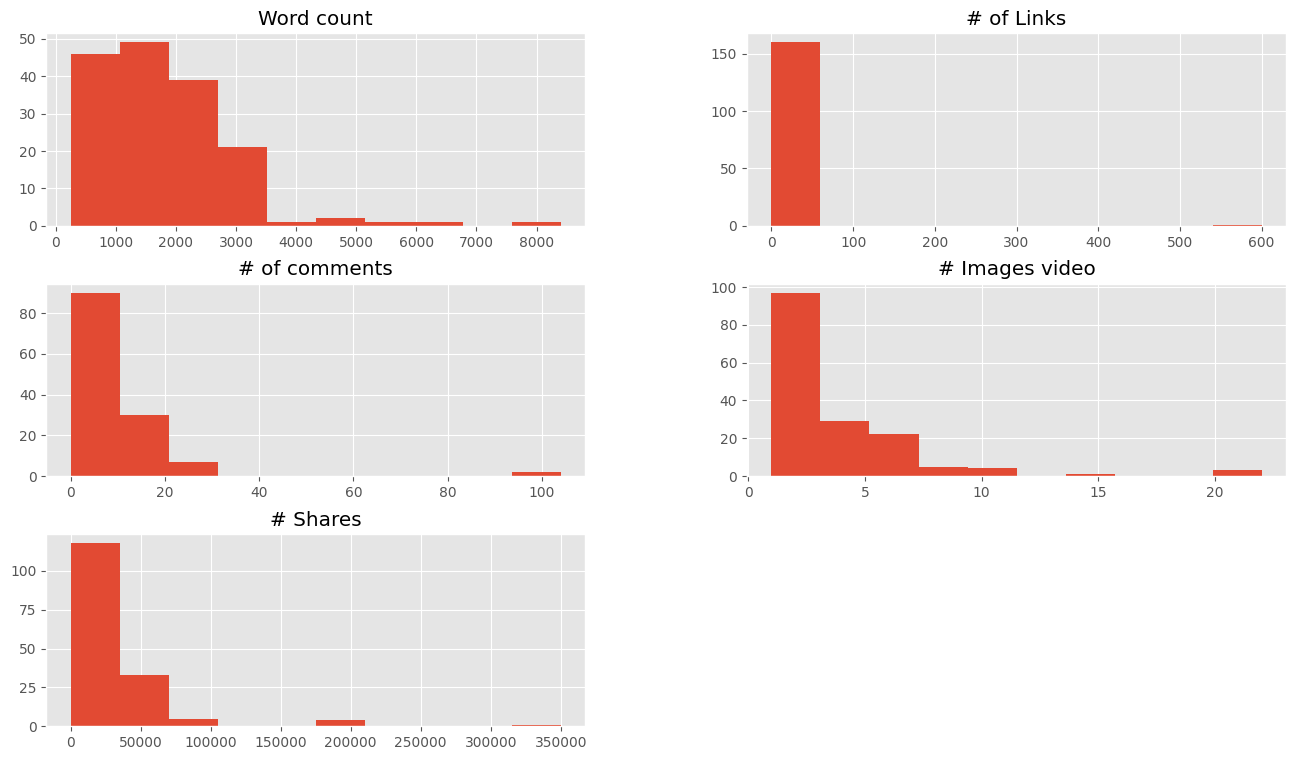

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

datos = pd.read_csv('/content/sample_data/articulos_ml.csv')
#datos.head()
#datos.describe()
datos.drop(['Title', 'url', 'Elapsed days'], axis = 1).hist()
plt.show()

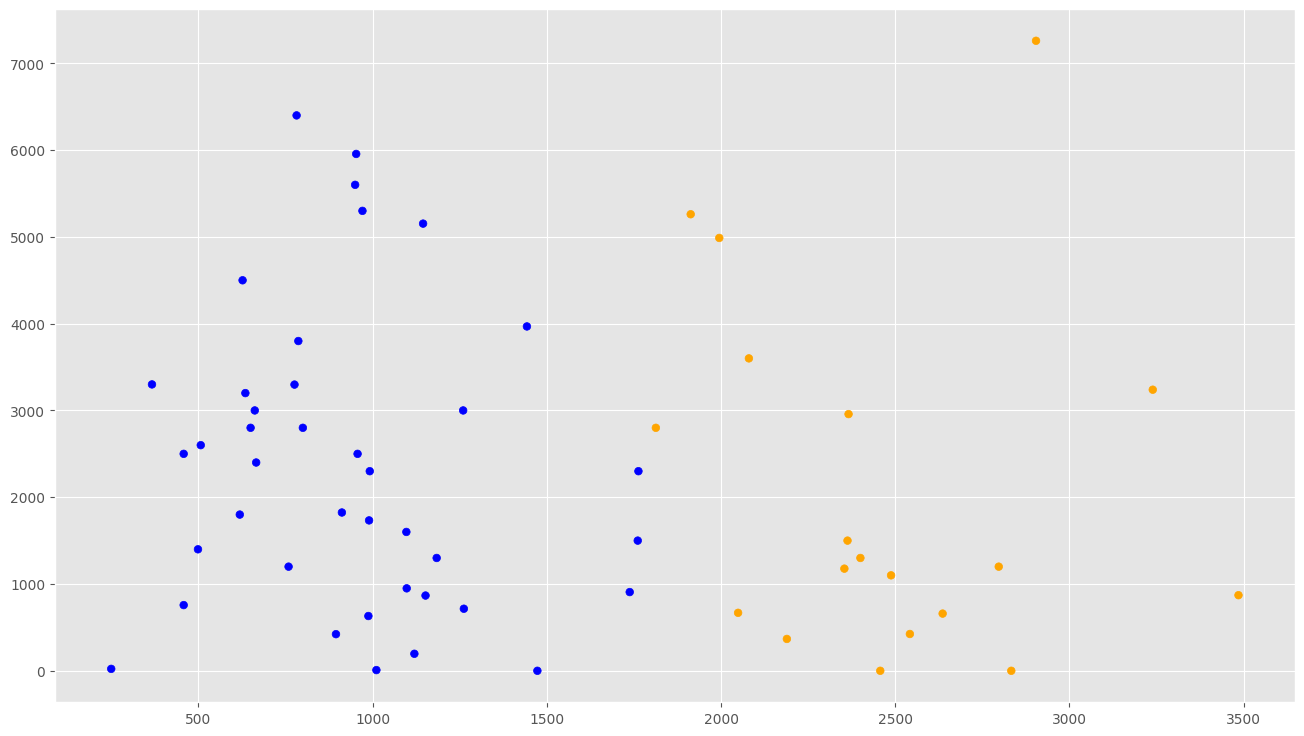

In [7]:
datos_filtrados = datos[(datos['Word count'] <= 3500) & (datos['# Shares'] <= 8000)]

colores = ['orange', 'blue']
tamanios = [30, 60]

f1 = datos_filtrados['Word count'].values
f2 = datos_filtrados['# Shares'].values

asignar = []
for index, row in datos_filtrados.iterrows():
  if(row['Word count'] > 1808):
    asignar.append(colores[0])
  else:
    asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()